In [1]:
print("hello")

hello


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\KA PATEL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


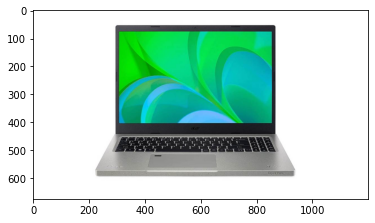

In [5]:
img=image.load_img("C:\\Users\\KA PATEL\\Downloads\\imagedata\\training\\laptop\\1.jpg")
plt.imshow(img)

In [6]:
cv2.imread("C:\\Users\\KA PATEL\\Downloads\\imagedata\\training\\laptop\\1.jpg").shape

(675, 1200, 3)

In [7]:
import os

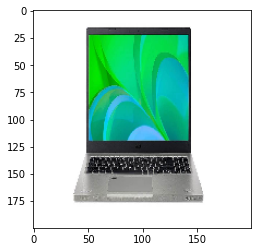

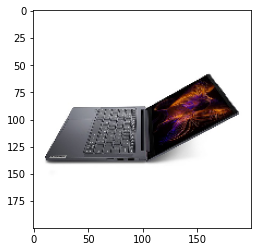

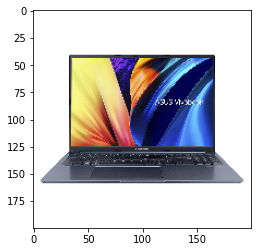

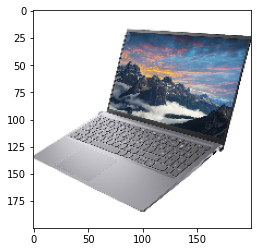

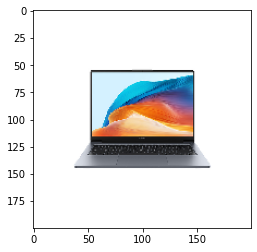

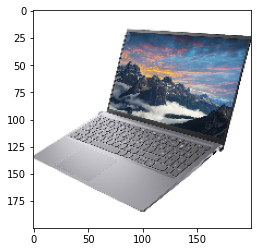

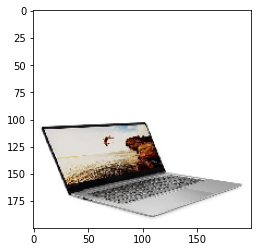

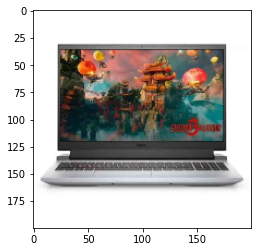

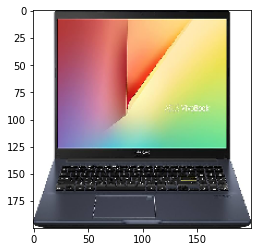

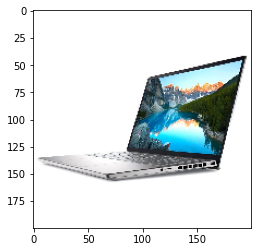

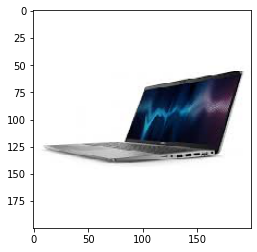

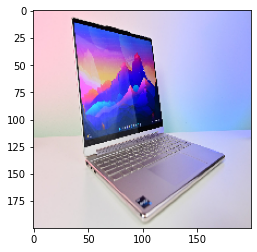

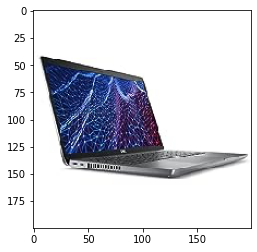

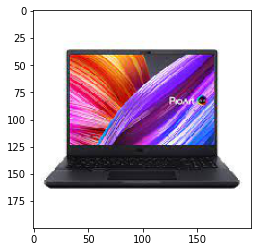

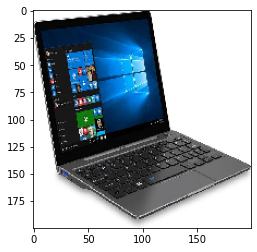

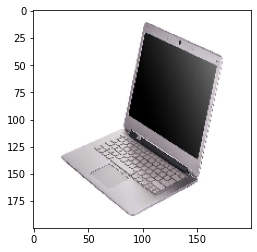

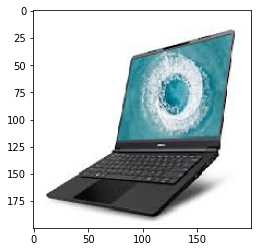

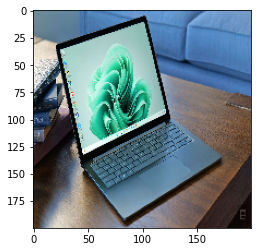

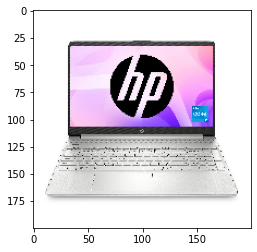

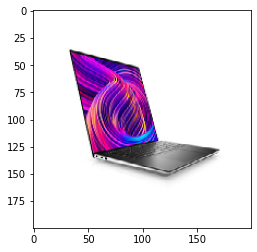

In [8]:
dir_path="C:\\Users\\KA PATEL\\Downloads\\imagedata\\training\\laptop"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+"\\"+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6978 - accuracy: 0.4333 - val_loss: 1.0869 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 1s 946ms/step - loss: 1.2294 - accuracy: 0.6667 - val_loss: 0.5903 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 1s 954ms/step - loss: 0.6133 - accuracy: 0.6667 - val_loss: 0.7317 - val_accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 1s 981ms/step - loss: 0.7712 - accuracy: 0.5000 - val_loss: 0.6837 - val_accuracy: 0.7000
Epoch 5/10
1/1 [==============================] - 1s 973ms/step - loss: 0.6758 - accuracy: 0.5333 - val_loss: 0.6433 - val_accuracy: 0.7000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.6545 - accuracy: 0.6333 - val_loss: 0.6063 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 1s 859ms/step - loss: 0.5959 - accur

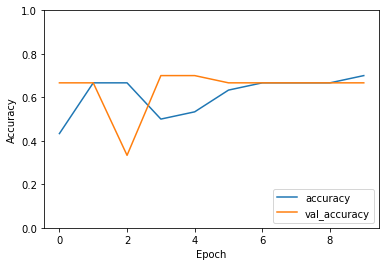

Found 9 images belonging to 2 classes.


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define paths to your training, validation, and testing folders
train_data_dir = 'C:\\Users\\KA PATEL\\Downloads\\imagedata\\training'
validation_data_dir = 'C:\\Users\\KA PATEL\\Downloads\\imagedata\\validation'
test_data_dir = 'C:\\Users\\KA PATEL\\Downloads\\imagedata\\testing'

# Set hyperparameters
epochs = 10
batch_size = 32
input_shape = (128, 128, 3)  # Adjust image size as needed

# Data augmentation for training and validation images
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on testing data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)



In [10]:
print("Number of testing samples:", len(test_generator))


Number of testing samples: 1


In [11]:
for filename in test_generator.filenames:
    print(filename)


laptop\101.jpg
laptop\102.jpg
laptop\103.jpg
laptop\104.jpg
mobile\105.jpg
mobile\106.jpg
mobile\107.jpg
mobile\108.jpg
mobile\109.jpg


In [12]:
print("Class indices:", test_generator.class_indices)


Class indices: {'laptop': 0, 'mobile': 1}


In [13]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)


1/1 [==============================] - 0s 92ms/step - loss: 0.6879 - accuracy: 0.4444
Test accuracy: 0.4444444477558136


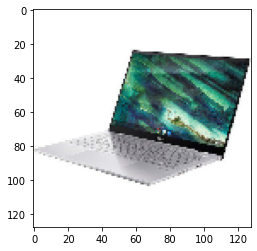

1/1 [==============================] - 0s 61ms/step
[[0.]]


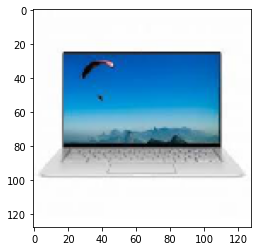

1/1 [==============================] - 0s 28ms/step
[[0.]]


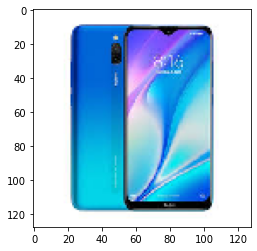

1/1 [==============================] - 0s 22ms/step
[[1.233329e-22]]


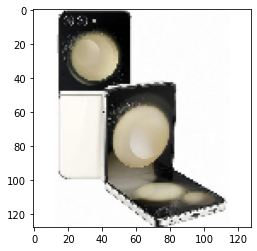

1/1 [==============================] - 0s 20ms/step
[[0.]]


In [17]:
dir_path = "C://Users//KA PATEL//Downloads//imagedata//testing1//"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i,target_size=(128,128))
    plt.imshow(img)
    plt.show()
    
    IA = image.img_to_array(img)
    IA = np.expand_dims(IA,axis=0)
    testimg = np.vstack([IA])
    ans = model.predict(testimg)
    print(ans)